# Predicting Hazardous NEOs (Nearest Earth Objects)

This is classification task to predict whether the NEO is hazardous or not

## Load Important Packages

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

## Download and explore the data 

In [2]:
df= pd.read_csv('nearest-earth-objects.csv')
df.head()

,neo_id,name,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,orbiting_body,relative_velocity,miss_distance,is_hazardous
0,2162117,162117 (1998 SD15),19.14,0.394962,0.883161,Earth,71745.401048,5.814362e+07,False
1,2349507,349507 (2008 QY),18.50,0.530341,1.185878,Earth,109949.757148,5.580105e+07,True
2,2455415,455415 (2003 GA),21.45,0.136319,0.304818,Earth,24865.506798,6.720689e+07,False
3,3132126,(2002 PB),20.63,0.198863,0.444672,Earth,78890.076805,3.039644e+07,False
4,3557844,(2011 DW),22.70,0.076658,0.171412,Earth,56036.519484,6.311863e+07,False


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338199 entries, 0 to 338198
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   neo_id                  338199 non-null  int64  
 1   name                    338199 non-null  object 
 2   absolute_magnitude      338171 non-null  float64
 3   estimated_diameter_min  338171 non-null  float64
 4   estimated_diameter_max  338171 non-null  float64
 5   orbiting_body           338199 non-null  object 
 6   relative_velocity       338199 non-null  float64
 7   miss_distance           338199 non-null  float64
 8   is_hazardous            338199 non-null  bool   
dtypes: bool(1), float64(5), int64(1), object(2)
memory usage: 21.0+ MB


In [4]:
df.describe()

,neo_id,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,relative_velocity,miss_distance
count,3.381990e+05,338171.000000,338171.000000,338171.000000,338199.000000,3.381990e+05
mean,1.759939e+07,22.932525,0.157812,0.352878,51060.662908,4.153535e+07
std,2.287225e+07,2.911216,0.313885,0.701869,26399.238435,2.077399e+07
min,2.000433e+06,9.250000,0.000511,0.001143,203.346433,6.745533e+03
25%,3.373980e+06,20.740000,0.025384,0.056760,30712.031471,2.494540e+07
50%,3.742127e+06,22.800000,0.073207,0.163697,47560.465474,4.332674e+07
75%,5.405374e+07,25.100000,0.189041,0.422708,66673.820614,5.933961e+07
max,5.446281e+07,33.580000,37.545248,83.953727,291781.106613,7.479865e+07


In [5]:
df.isnull().sum()

neo_id                     0
name                       0
absolute_magnitude        28
estimated_diameter_min    28
estimated_diameter_max    28
orbiting_body              0
relative_velocity          0
miss_distance              0
is_hazardous               0
dtype: int64

There are only 3 columns with 28 null values , we will not do anything about them for now until we find if they will be important to keep or not 

## Data Visualization

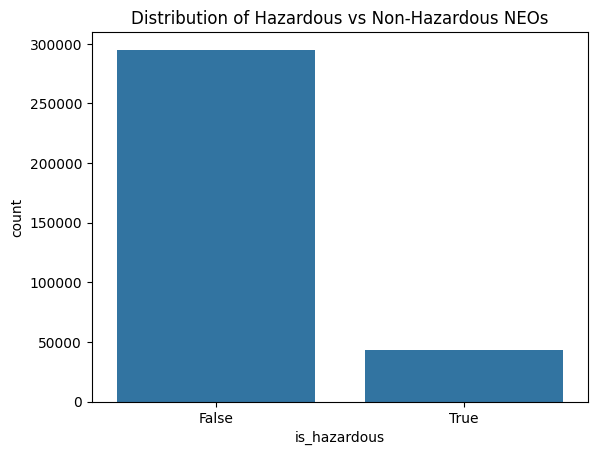

In [6]:
# Distribution of the target variable 'is_hazardous'
sns.countplot(x='is_hazardous', data=df)
plt.title('Distribution of Hazardous vs Non-Hazardous NEOs')
plt.show()

In [7]:
df['is_hazardous'] = df['is_hazardous'].astype(int)

changed the type of the target column to be plotted inside the correlation matrix and it will be necessary in the classification 

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338199 entries, 0 to 338198
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   neo_id                  338199 non-null  int64  
 1   name                    338199 non-null  object 
 2   absolute_magnitude      338171 non-null  float64
 3   estimated_diameter_min  338171 non-null  float64
 4   estimated_diameter_max  338171 non-null  float64
 5   orbiting_body           338199 non-null  object 
 6   relative_velocity       338199 non-null  float64
 7   miss_distance           338199 non-null  float64
 8   is_hazardous            338199 non-null  int32  
dtypes: float64(5), int32(1), int64(1), object(2)
memory usage: 21.9+ MB


In [9]:
num_col = df.select_dtypes(include=['int64','float64','int32'])

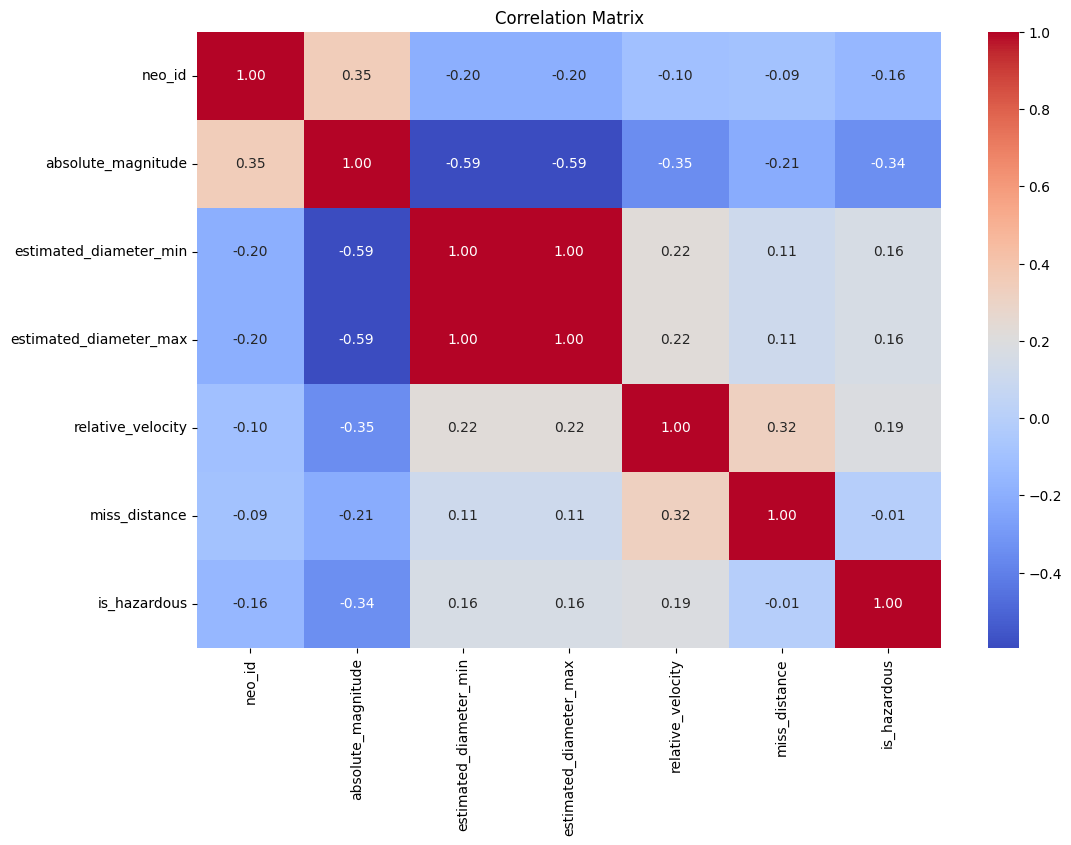

In [10]:
# Calculate the correlation matrix
corr_matrix = num_col.corr()

# Visualize the correlation matrix with a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [11]:
# Set a threshold for considering correlations as "high"
threshold = 0.8

# Identify pairs of columns that are highly correlated
high_corr_pairs = []

# Loop through the correlation matrix
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            colname1 = corr_matrix.columns[i]
            colname2 = corr_matrix.columns[j]
            high_corr_pairs.append((colname1, colname2, corr_matrix.iloc[i, j]))

# Display highly correlated pairs
print("\nHighly Correlated Pairs (threshold > 0.8):")
for pair in high_corr_pairs:
    print(f"{pair[0]} and {pair[1]}: Correlation = {pair[2]:.2f}")


Highly Correlated Pairs (threshold > 0.8):
estimated_diameter_max and estimated_diameter_min: Correlation = 1.00


--------------------------------------------------------------------------------------------------------------------------------
estimated_diameter_max and estimated_diameter_min are HIGHLY CORRELATED so they have almost the same information so we will drop one of them 


In [12]:
df = df.drop(columns=['estimated_diameter_max'])

In [13]:
num_col = num_col.drop(columns=['estimated_diameter_max'])

In [14]:
num_col.columns

Index(['neo_id', 'absolute_magnitude', 'estimated_diameter_min',
       'relative_velocity', 'miss_distance', 'is_hazardous'],
      dtype='object')

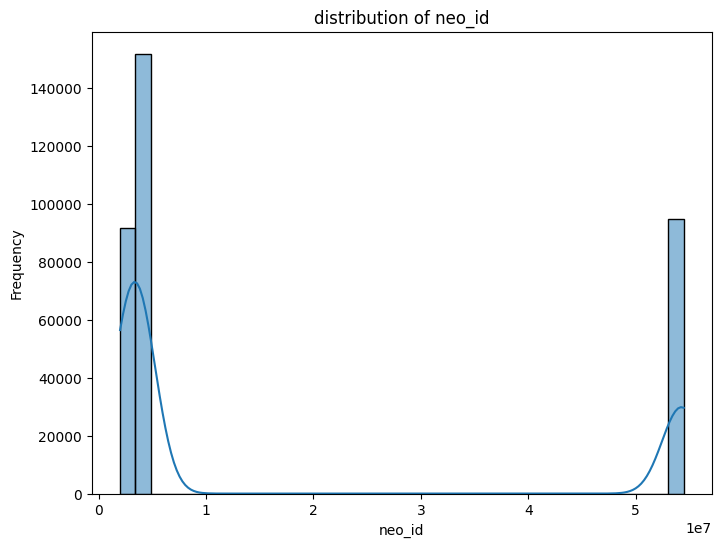

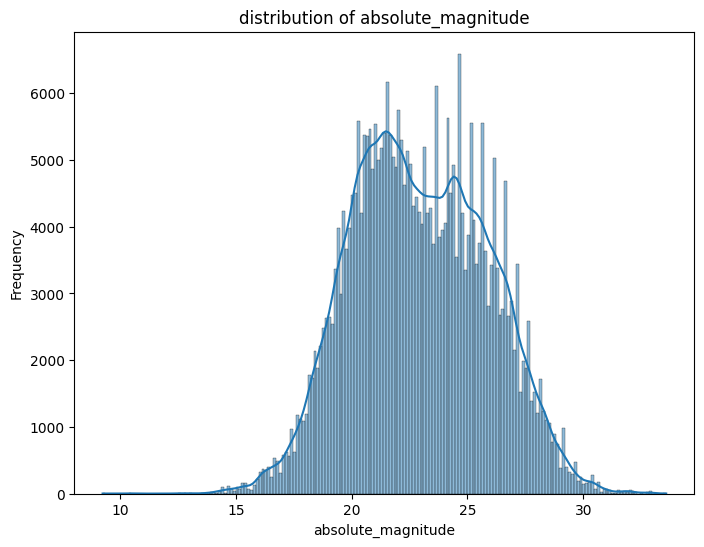

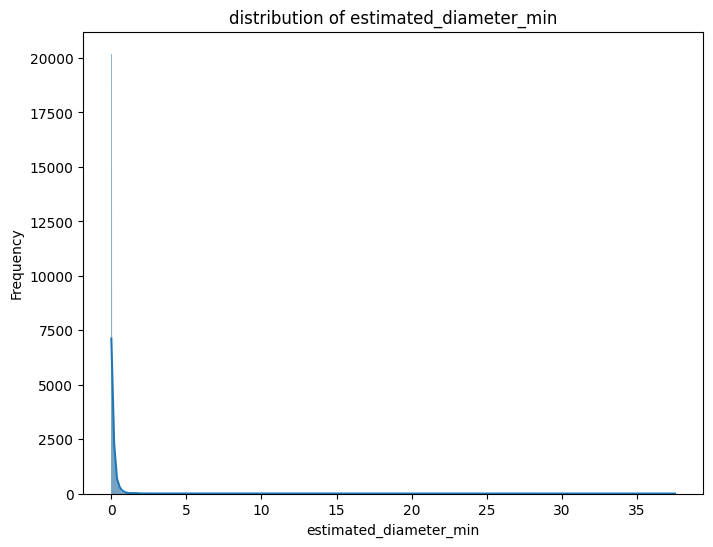

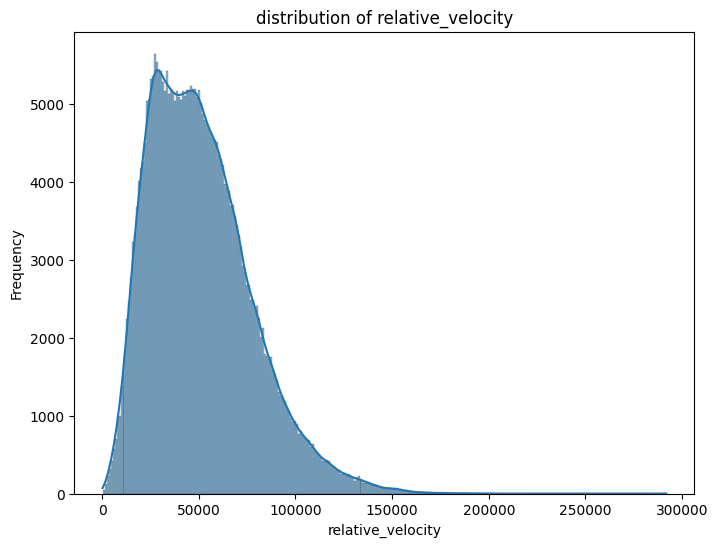

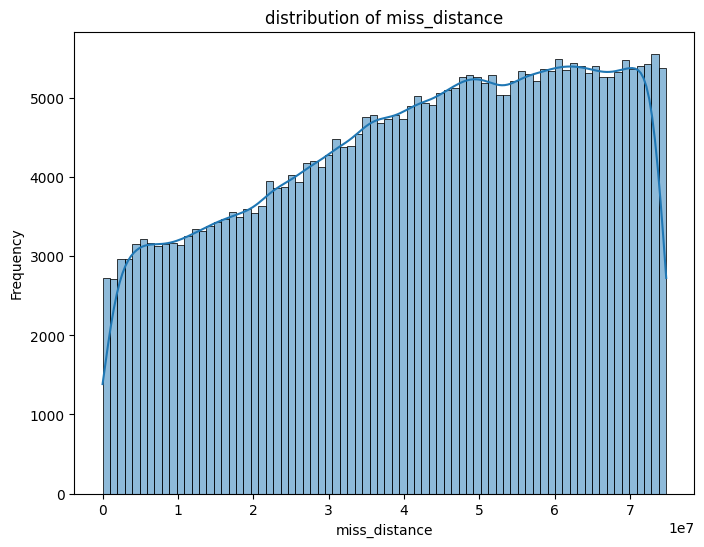

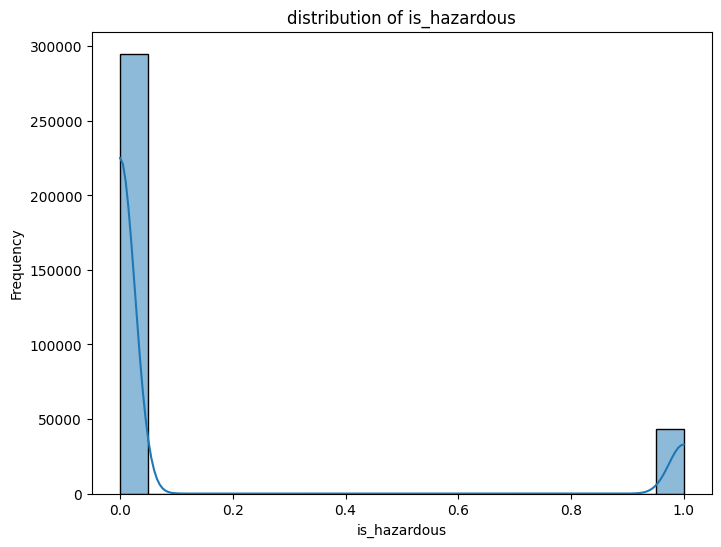

In [15]:
#Show the distribution of the columns 
for col in num_col:
    plt.figure(figsize=(8,6))
    
    sns.histplot(df[col],kde=True)
    plt.title(f'distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

As we see in these plots the columns (relative velocity, estimated diameter min) are SKEWED TO THE LEFT

In [22]:
# drop unecessary columns 
df = df.drop(['neo_id', 'name', 'orbiting_body'], axis=1)
df = df.dropna()

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# Feature-target split
X = df.drop('is_hazardous', axis=1)
y = df['is_hazardous']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Handle imbalanced classes using SMOTE if there is any imbalanced classes
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Feature scaling
scaler = StandardScaler()
X_train_smote = scaler.fit_transform(X_train_smote)
X_test = scaler.transform(X_test)


In [31]:
X_train.columns

Index(['absolute_magnitude', 'estimated_diameter_min', 'relative_velocity',
       'miss_distance'],
      dtype='object')

In [30]:
X_train_smote

array([[ 2.10026773, -0.68691053, -1.32954328, -1.91283019],
       [-0.421774  , -0.07496397,  1.45218612,  0.2962927 ],
       [-1.00899565,  0.59910187,  0.46930008,  1.15612162],
       ...,
       [-0.10550874, -0.27116191,  0.95710025,  0.00984449],
       [-0.47478814,  0.01513844,  0.10234884, -1.01349505],
       [ 0.00568367, -0.33607904, -0.59737395,  1.54494808]])

## Model Training and Evaluation

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.94      0.95     88503
           1       0.64      0.67      0.65     12949

    accuracy                           0.91    101452
   macro avg       0.79      0.81      0.80    101452
weighted avg       0.91      0.91      0.91    101452

Confusion Matrix:
 [[83524  4979]
 [ 4276  8673]]
ROC-AUC Score: 0.9432154658094138


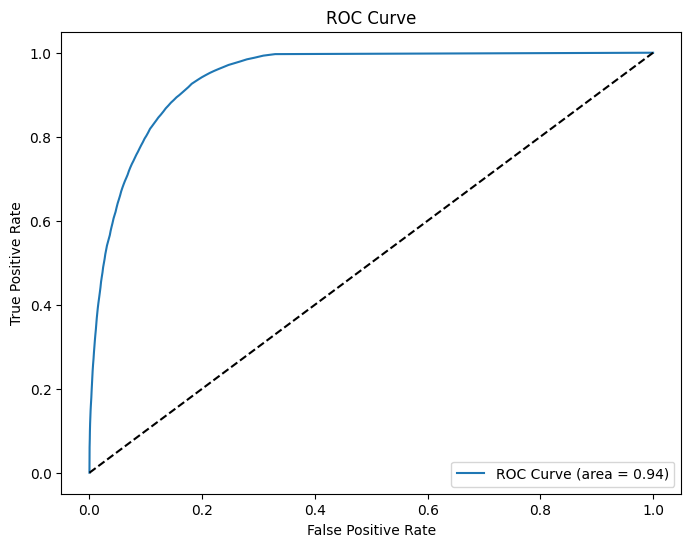

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Initialize the model
model = RandomForestClassifier(random_state=42, class_weight='balanced')

# Train the model
model.fit(X_train_smote, y_train_smote)

# Predict on test data
y_pred = model.predict(X_test)

# Model evaluation
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# ROC-AUC Score
y_pred_prob = model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_prob)
print("ROC-AUC Score:", roc_auc)

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


C:\Users\Dell\AppData\Local\Temp\ipykernel_11492\4187642865.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='viridis')


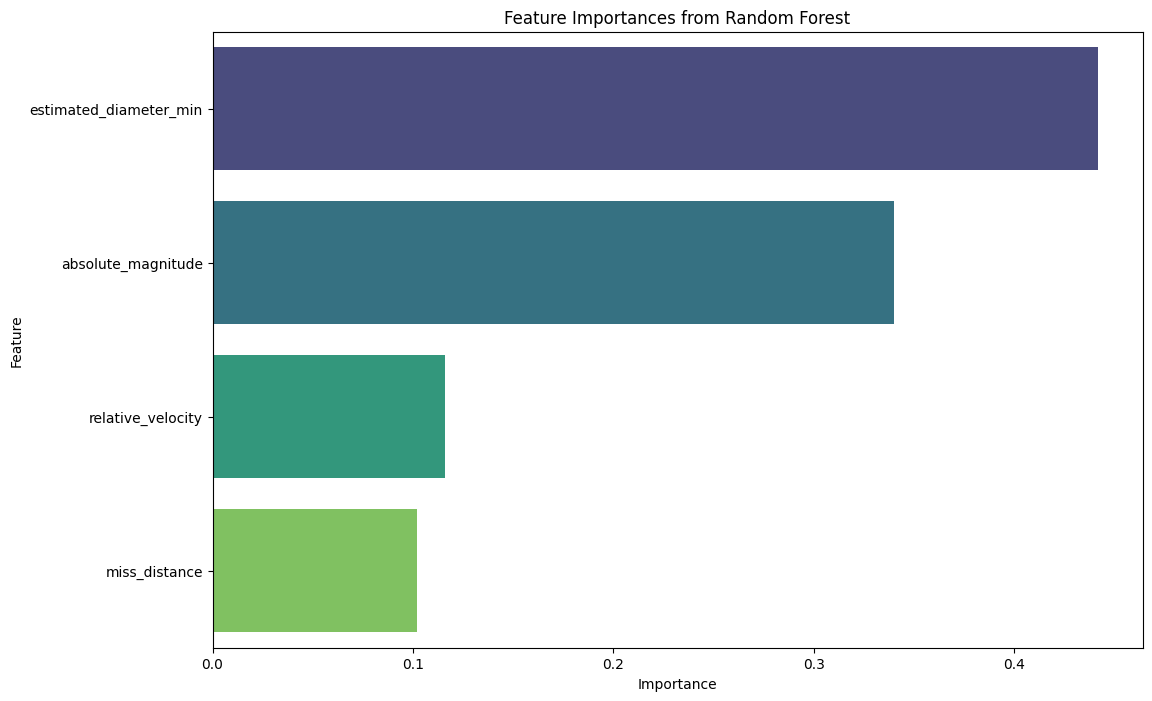

In [32]:
# Feature Importance
importances = model.feature_importances_
feature_names = ['absolute_magnitude', 'estimated_diameter_min', 'relative_velocity',
       'miss_distance']
# Create a DataFrame for plotting
feature_importances = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot Feature Importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='viridis')
plt.title('Feature Importances from Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

This conclude that the estimated_diameter_min and absolute_magnitude has the higher importance in the classification process